# Regression model for predicting concrete compressive strength

## Julian Ariza

In this course project, I will build a regression model using the deep learning Keras library, and then I will experiment with increasing the number of training epochs and changing number of hidden layers.

## Table of contents
* [Download and Cleaning of the Dataset](#data)
* [A. Building a baseline model](#a)
* [B. Normilizing Data](#b)
* [C. Increasing the number of epochs](#c)
* [D. Increasing the number of hidden layers](#d)

## Download and Cleaning of the Dataset <a name="data"></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://cocl.us/concrete_data')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [2]:
df.describe(include = 'all')

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [3]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [4]:
columns = df.columns
features = df[columns[columns != 'Strength']]
target = df['Strength']
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [5]:
n_features = features.shape[1]
n_features

8

## A. Building a baseline model <a name="a"></a>

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [7]:
def regression_model_baseline():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape = (n_features,)))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model    

In [8]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=5)

In [9]:
model_baseline = regression_model_baseline()

In [10]:
error = np.zeros(50)
for i in range(50):
    model_baseline.fit(X_train, y_train, epochs = 50, verbose = 0)
    yhat = model_baseline.predict(X_test)
    error[i] = mean_squared_error(y_test,yhat)

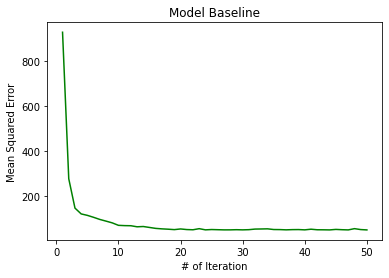

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot(range(1,51),error,'g')
plt.title('Model Baseline')
plt.ylabel('Mean Squared Error')
plt.xlabel('# of Iteration')
plt.show()

In [12]:
print('The mean of the Mean Squared Error is: ', error.mean())
print('The standard deviation of the Mean Squared Error is: ', error.std())

The mean of the Mean Squared Error is:  83.1696275597156
The standard deviation of the Mean Squared Error is:  126.0292200503933


## B. Normalizing the Data <a name="b"></a>

In [13]:
features_norm = (features - features.mean())/features.std()
features_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [14]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(features_norm, target, test_size = 0.3, random_state = 5)
model_baseline_norm = regression_model_baseline()

In [15]:
error = np.zeros(50)
for i in range(50):
    model_baseline_norm.fit(X_train_norm, y_train, epochs = 50, verbose = 0)
    yhat = model_baseline_norm.predict(X_test_norm)
    error[i] = mean_squared_error(y_test,yhat)

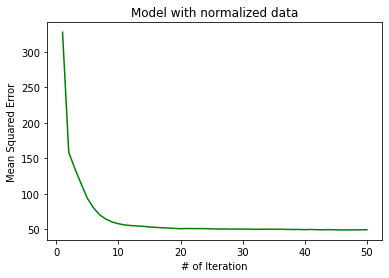

In [16]:
plt.plot(range(1,51),error,'g')
plt.title('Model with normalized data')
plt.ylabel('Mean Squared Error')
plt.xlabel('# of Iteration')
plt.show()

In [17]:
print('The mean of the Mean Squared Error is: ', error.mean())
print('The standard deviation of the Mean Squared Error is: ', error.std())

The mean of the Mean Squared Error is:  63.983252593626865
The standard deviation of the Mean Squared Error is:  43.36843753226346


The mean is lower than the one in A and its behaivor on each iteration is less noisy compared to A.

## C. Increasing the number of epochs <a name="c"></a>

In [18]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(features_norm, target, test_size = 0.3, random_state = 5)
model_baseline_norm_100 = regression_model_baseline()

In [19]:
error = np.zeros(50)
for i in range(50):
    model_baseline_norm_100.fit(X_train_norm, y_train, epochs = 100, verbose = 0)
    yhat = model_baseline_norm_100.predict(X_test_norm)
    error[i] = mean_squared_error(y_test,yhat)

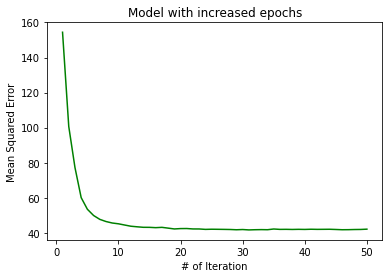

In [20]:
plt.plot(range(1,51),error,'g')
plt.title('Model with increased epochs')
plt.ylabel('Mean Squared Error')
plt.xlabel('# of Iteration')
plt.show()

In [21]:
print('The mean of the Mean Squared Error is: ', error.mean())
print('The standard deviation of the Mean Squared Error is: ', error.std())

The mean of the Mean Squared Error is:  47.39765617819888
The standard deviation of the Mean Squared Error is:  18.152452120836195


The mean in C is lower than B.

## D. Increasing the number of hidden layers <a name="d"></a>

In [22]:
def regression_model():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape = (n_features,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model  

In [23]:
X_train_norm, X_test_norm, y_train, y_test = train_test_split(features_norm, target, test_size = 0.3, random_state = 5)
model = regression_model()

In [24]:
error = np.zeros(50)
for i in range(50):
    model.fit(X_train_norm, y_train, epochs = 50, verbose = 0)
    yhat = model.predict(X_test_norm)
    error[i] = mean_squared_error(y_test,yhat)

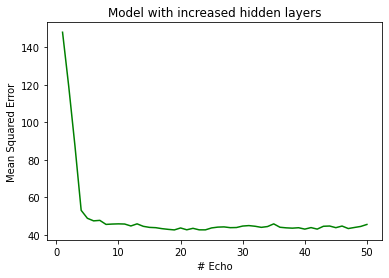

In [25]:
plt.plot(range(1,51),error,'g')
plt.title('Model with increased hidden layers')
plt.ylabel('Mean Squared Error')
plt.xlabel('# Echo')
plt.show()

In [26]:
print('The mean of the Mean Squared Error is: ', error.mean())
print('The standard deviation of the Mean Squared Error is: ', error.std())

The mean of the Mean Squared Error is:  48.96984590739673
The standard deviation of the Mean Squared Error is:  18.598482370488075


The mean in D is lower than the one B.